In [1]:
import keras
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
print(y_train.shape)
print(y_test.shape)
y_train=y_train.flatten()#展开
y_test=y_test.flatten()
print(y_train.shape)
print(y_test.shape)

Using TensorFlow backend.


(50000, 1)
(10000, 1)
(50000,)
(10000,)


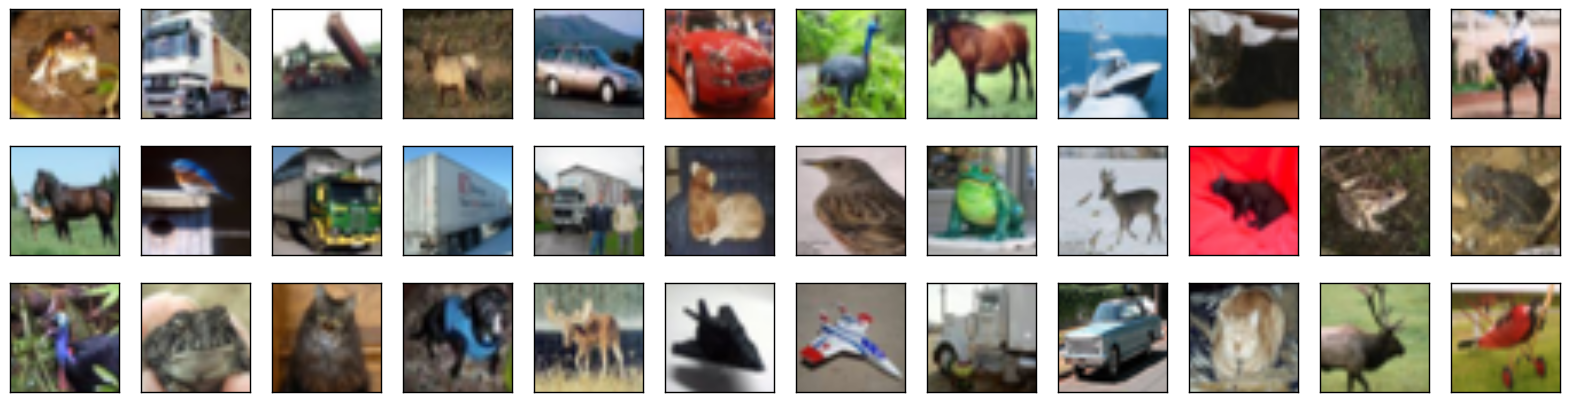

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#可视化
fig=plt.figure(figsize=(20,5))
for i in range(36):
    ax=fig.add_subplot(3,12,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

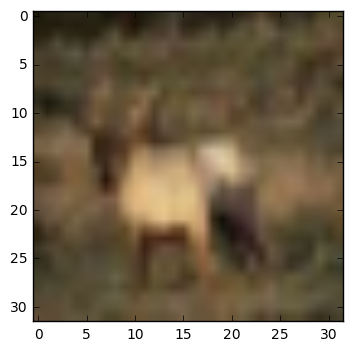

In [3]:
import matplotlib.pyplot as plt
plt.imshow((x_train[3]))

In [4]:
#缩放数据
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [5]:
from keras.utils import np_utils
from keras.utils import to_categorical
#消除重复  即得到有多少种类
num_classes=len(np.unique(y_train))
#编码
y_train=to_categorical(y_train,num_classes)
y_test =to_categorical(y_test, num_classes)
#划分数据集 后面直接训练的时候划分 比较方便
#from sklearn.model_selection import train_test_split
#x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train,test_size=0.1,random_state=0)
#print(x_train.shape)
#print(x_test.shape)
#print(x_valid.shape)

In [6]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
#MLP神经网络 接受一维
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten
model=Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               500500    
_________________________________________________________________
dropout_2 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
__________

In [8]:
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [9]:
#训练
#verbose：日志显示
#verbose = 0 为不在标准输出流输出日志信息
#verbose = 1 为输出进度条记录
#verbose = 2 为每个epoch输出一行记录
from keras.callbacks import ModelCheckpoint#在每个epoch之后保存权重



checkpointer = ModelCheckpoint(filepath='MLP.weights.best.hdf5',verbose=1,save_best_only=True)
#filepath 文件保存位置 verbose=1 文本输出 权重文件何时更新
hist=model.fit(x_train,y_train,batch_size=128,epochs=10,validation_split=0.1,callbacks=[checkpointer],verbose=1,shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 54s 1ms/step - loss: 2.2088 - acc: 0.2018 - val_loss: 1.9555 - val_acc: 0.2918

Epoch 00001: val_loss improved from inf to 1.95550, saving model to MLP.weights.best.hdf5
Epoch 2/10
45000/45000 [==============================] - 51s 1ms/step - loss: 1.9471 - acc: 0.2942 - val_loss: 1.8899 - val_acc: 0.3236

Epoch 00002: val_loss improved from 1.95550 to 1.88986, saving model to MLP.weights.best.hdf5
Epoch 3/10
45000/45000 [==============================] - 48s 1ms/step - loss: 1.8807 - acc: 0.3215 - val_loss: 1.8866 - val_acc: 0.3296

Epoch 00003: val_loss improved from 1.88986 to 1.88659, saving model to MLP.weights.best.hdf5
Epoch 4/10
45000/45000 [==============================] - 49s 1ms/step - loss: 1.8401 - acc: 0.3380 - val_loss: 1.8001 - val_acc: 0.3762

Epoch 00004: val_loss improved from 1.88659 to 1.80010, saving model to MLP.weights.best.hdf5
Epoch 5/10
45000/45000 [===

In [1]:
model.load_weights('MLP.weights.best.hdf5')
score=model.evaluate(x_test,y_test,verbose=1)

NameError: name 'model' is not defined

In [11]:
print('acc:',score[1])

acc: 0.3938
